In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the dataset
file_path = 'Codes/vehicle_section.csv'
data = pd.read_csv(file_path)
data.head(), data.columns

(  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0        NaN  4.00-4.05  4.05-4.10  4.10-4.14  4.15-4.20  4.20-4.25   
 1         NE          3          6          3          3          2   
 2         EN          2          1          3          2          3   
 3         NW          2          2          1          1          1   
 4         WN          0          0          0          0          0   
 
   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
 0  4.25-4.30  4.30-4.35  4.35-4.40  4.40-4.45   4.45-4.50   4.50-4.55   
 1          3          9          2         12           5          12   
 2          1          3          5          2           6           5   
 3          1          2          1          1           0           1   
 4          1          0          1          0           0           0   
 
   Unnamed: 12  
 0   4.55-5.00  
 1           2  
 2           3  
 3           0  
 4           0  ,
 Index(['Unnamed:

In [3]:
# Rename the columns using the first row and then drop the first row
data.columns = data.iloc[0]
data = data.drop(data.index[0])

# Reset index of the DataFrame
data = data.reset_index(drop=True)

# Clean-up the column names to remove any leading/trailing whitespace
data.columns = [str(col).strip() for col in data.columns]

# Show the cleaned data
data.head()


,nan,4.00-4.05,4.05-4.10,4.10-4.14,4.15-4.20,4.20-4.25,4.25-4.30,4.30-4.35,4.35-4.40,4.40-4.45,4.45-4.50,4.50-4.55,4.55-5.00
0,NE,3,6,3,3,2,3,9,2,12,5,12,2
1,EN,2,1,3,2,3,1,3,5,2,6,5,3
2,NW,2,2,1,1,1,1,2,1,1,0,1,0
3,WN,0,0,0,0,0,1,0,1,0,0,0,0
4,SE,10,6,7,5,5,16,7,5,5,7,5,7


In [4]:
# Convert all data to numeric for calculation
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)

# Sum up the traffic for each direction over all time intervals
data['Total Traffic'] = data.iloc[:, 1:].sum(axis=1)

# Display the traffic totals for each direction
data[['nan', 'Total Traffic']]


,nan,Total Traffic
0,NE,62
1,EN,36
2,NW,13
3,WN,2
4,SE,85
5,ES,137
6,SW,8
7,WS,12
8,NS,365
9,SN,360


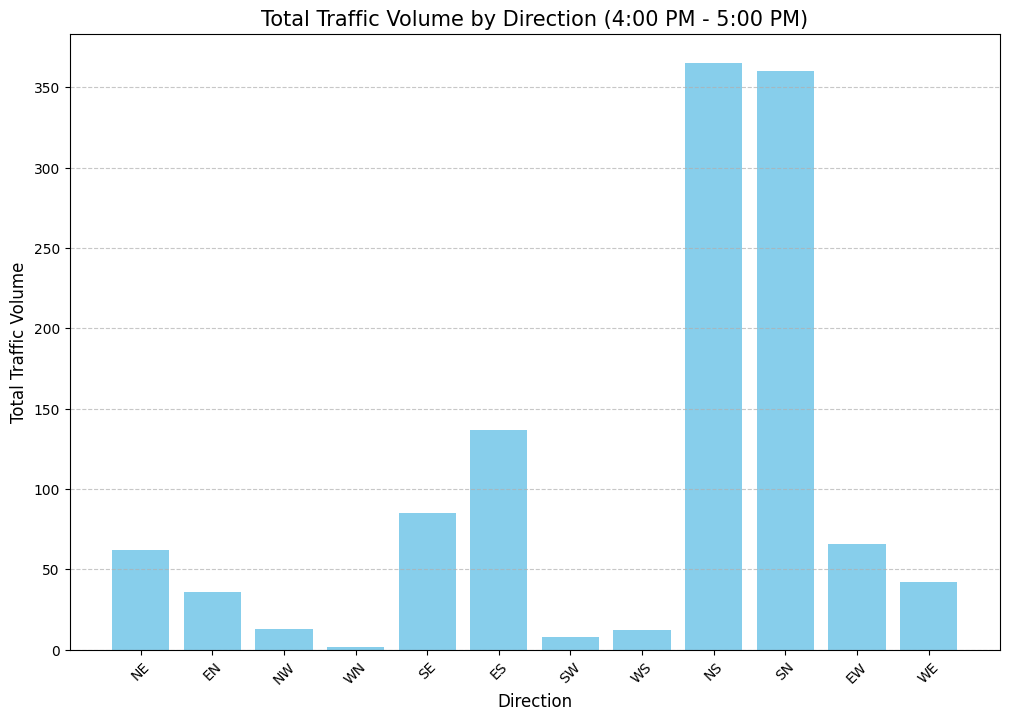

In [5]:
import matplotlib.pyplot as plt

# Set up the bar chart
plt.figure(figsize=(12, 8))
plt.bar(data['nan'], data['Total Traffic'], color='skyblue')
plt.title('Total Traffic Volume by Direction (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Total Traffic Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


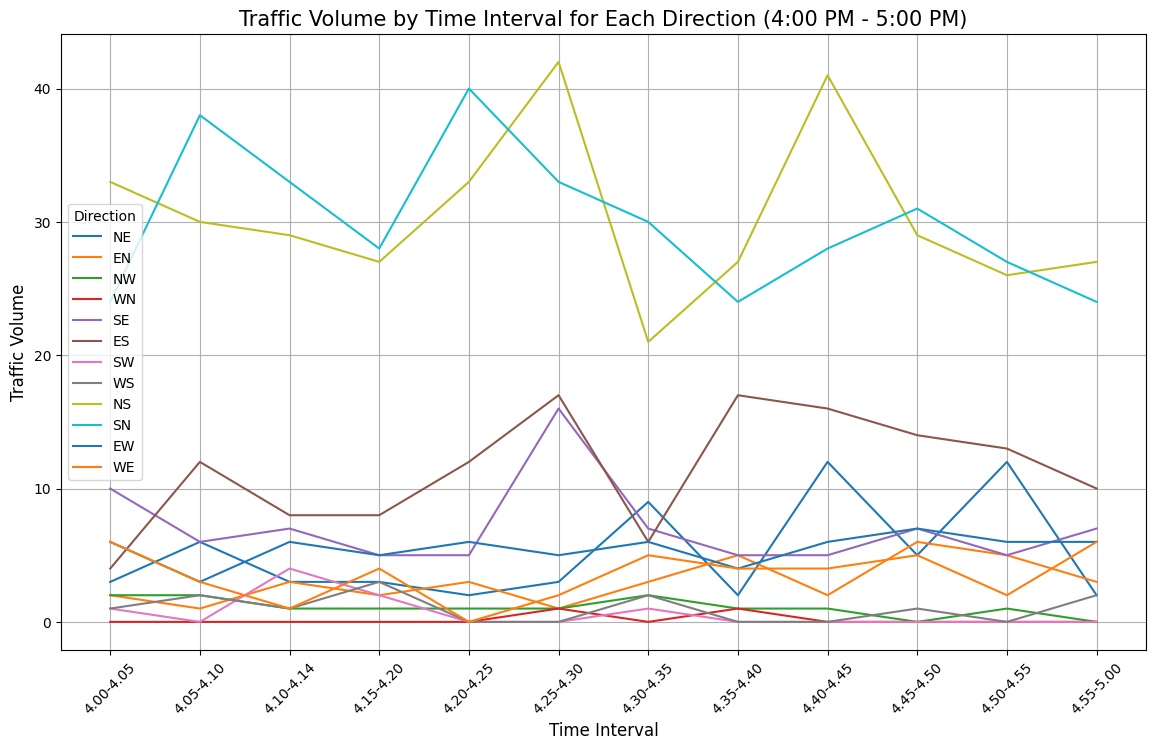

In [6]:
# Setting up the time series plot for each direction across the time intervals
time_intervals = data.columns[1:-1]  # excluding the 'nan' and 'Total Traffic' columns

plt.figure(figsize=(14, 8))
for index, row in data.iterrows():
    plt.plot(time_intervals, row[1:-1], label=row['nan'])

plt.title('Traffic Volume by Time Interval for Each Direction (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Time Interval', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.grid(True)

# Show the plot
plt.show()



In [12]:
# Load the data
people_file_path = 'Codes/people_section.csv'
people_data = pd.read_csv(people_file_path)
people_data.head()

,Unnamed: 0,4.00-4.05,4.05-4.10,4.10-4.14,4.15-4.20,4.20-4.25,4.25-4.30,4.30-4.35,4.35-4.40,4.40-4.45,4.45-4.50,4.50-4.55,4.55-5.00
0,NE,25,26,29,28,29,31,27,24,32,19,23,24
1,EN,39,30,35,57,34,41,35,32,38,54,32,42
2,NW,28,41,27,37,48,36,34,40,36,36,32,38
3,WN,56,42,35,42,40,38,38,37,33,35,46,39
4,SE,51,71,41,59,50,49,45,56,54,63,61,60


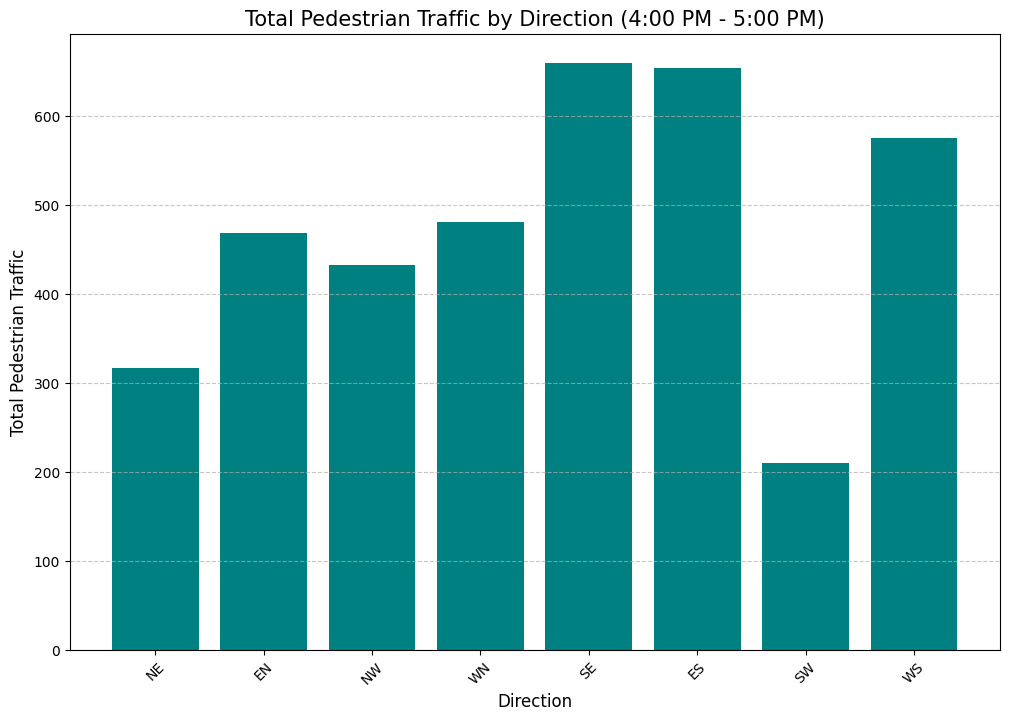

In [13]:
# Calculate the total pedestrian traffic for each direction over the hour
people_data['Total Pedestrian Traffic'] = people_data.iloc[:, 1:].sum(axis=1)

# Setting up the bar chart for total pedestrian traffic
plt.figure(figsize=(12, 8))
plt.bar(people_data['Unnamed: 0'], people_data['Total Pedestrian Traffic'], color='teal')
plt.title('Total Pedestrian Traffic by Direction (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Total Pedestrian Traffic', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


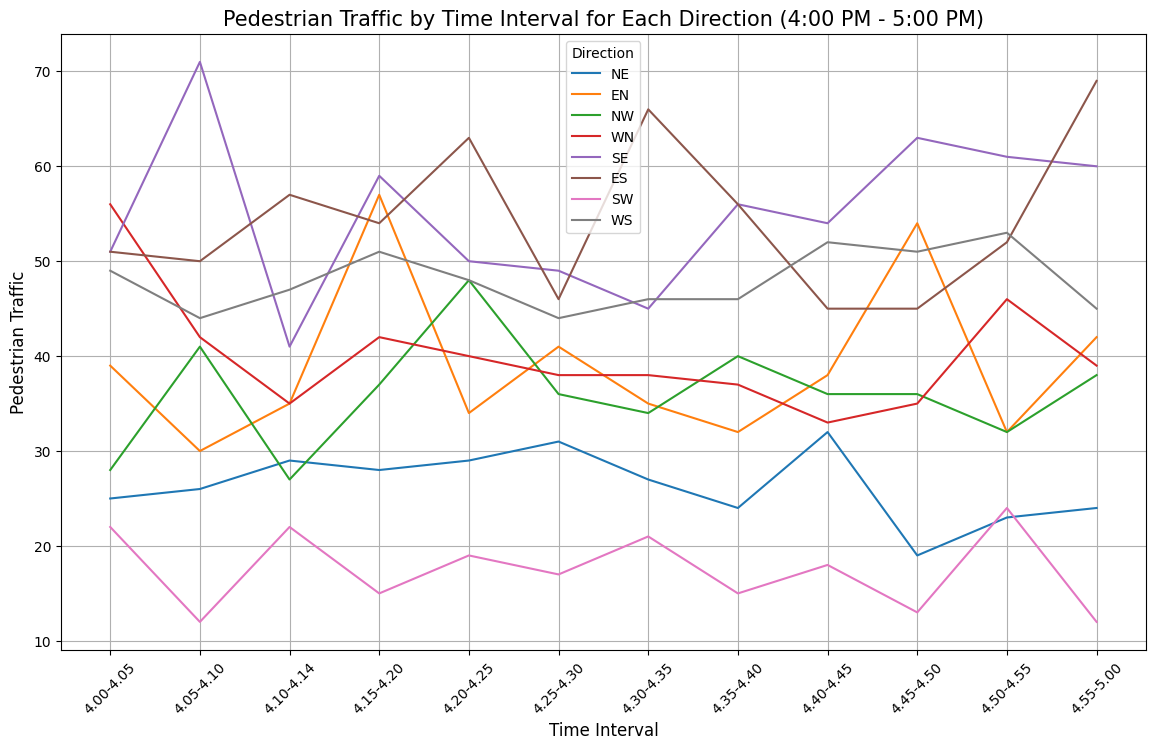

In [14]:
# Setting up the time series plot for pedestrian traffic on each direction across the time intervals
time_intervals_people = people_data.columns[1:-1]  # excluding the 'Unnamed: 0' and 'Total Pedestrian Traffic' columns

plt.figure(figsize=(14, 8))
for index, row in people_data.iterrows():
    plt.plot(time_intervals_people, row[1:-1], label=row['Unnamed: 0'])

plt.title('Pedestrian Traffic by Time Interval for Each Direction (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Time Interval', fontsize=12)
plt.ylabel('Pedestrian Traffic', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.grid(True)

# Show the plot
plt.show()


In [15]:
# Load the newly uploaded dataset about other vehicles like scooters and bicycles
reloaded_vehicles_file_path = 'Codes/cyclists_section.csv'
reloaded_vehicles_data = pd.read_csv(reloaded_vehicles_file_path)

# Check the first few rows to understand its structure and content
reloaded_vehicles_data.head()


,Unnamed: 0,4.00-4.05,4.05-4.10,4.10-4.14,4.15-4.20,4.20-4.25,4.25-4.30,4.30-4.35,4.35-4.40,4.40-4.45,4.45-4.50,4.50-4.55,4.55-5.00
0,NE,0,0,2,2,1,1,3,2,2,1,3,5
1,EN,1,3,2,2,1,3,0,2,1,1,2,6
2,NW,0,0,0,0,0,0,0,0,0,1,0,4
3,WN,0,0,0,0,0,0,0,0,0,0,0,4
4,SE,3,4,2,1,1,2,3,3,0,1,2,8


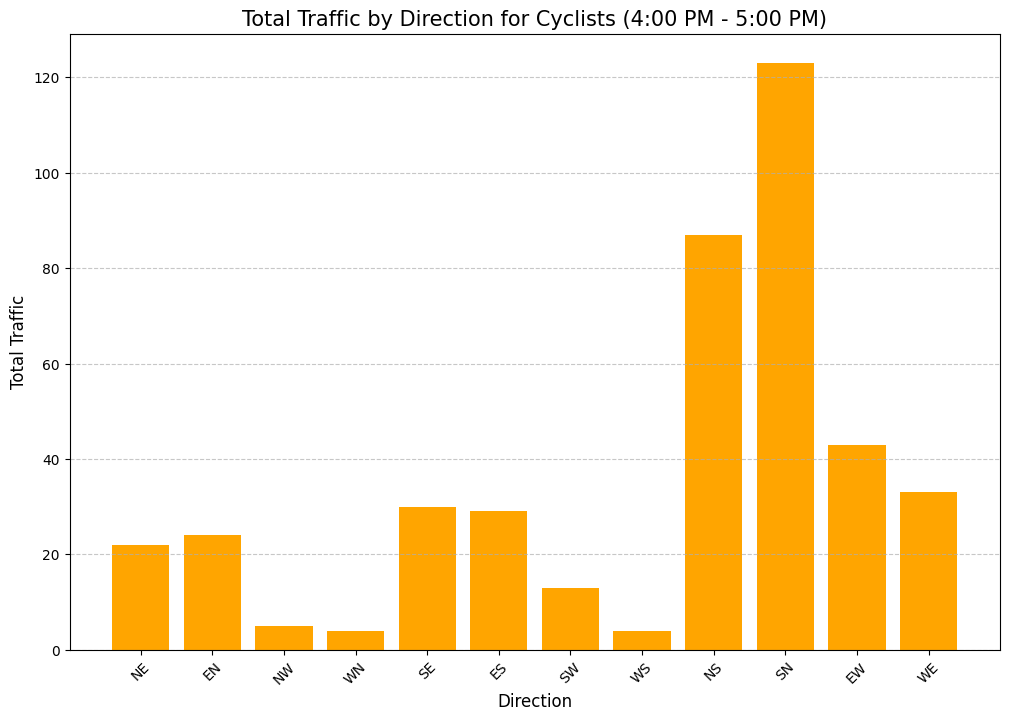

In [16]:
# Calculate the total traffic for each direction over the hour
reloaded_vehicles_data['Total Traffic'] = reloaded_vehicles_data.iloc[:, 1:].sum(axis=1)

# Setting up the bar chart for total traffic
plt.figure(figsize=(12, 8))
plt.bar(reloaded_vehicles_data['Unnamed: 0'], reloaded_vehicles_data['Total Traffic'], color='orange')
plt.title('Total Traffic by Direction for Cyclists (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Total Traffic', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


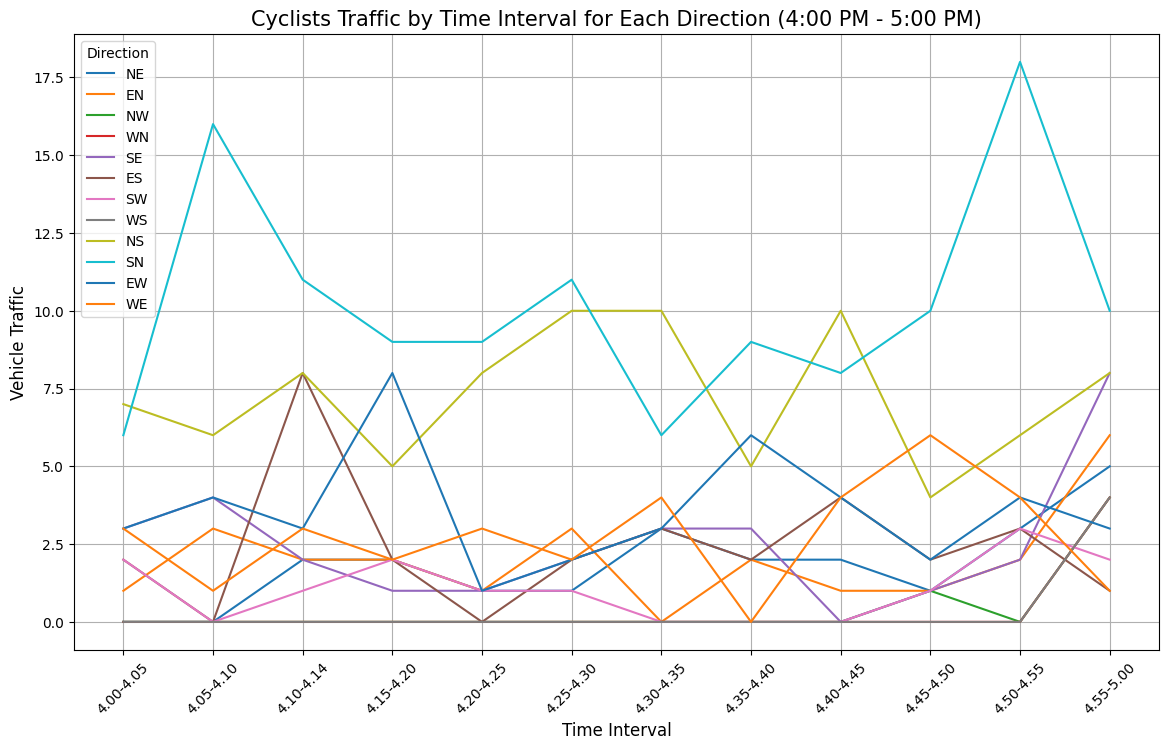

In [17]:
# Setting up the time series plot for vehicle traffic on each direction across the time intervals
time_intervals_vehicles = reloaded_vehicles_data.columns[1:-1]  # excluding the 'Unnamed: 0' and 'Total Traffic' columns

plt.figure(figsize=(14, 8))
for index, row in reloaded_vehicles_data.iterrows():
    plt.plot(time_intervals_vehicles, row[1:-1], label=row['Unnamed: 0'])

plt.title('Cyclists Traffic by Time Interval for Each Direction (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Time Interval', fontsize=12)
plt.ylabel('Vehicle Traffic', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.grid(True)

# Show the plot
plt.show()


In [18]:
older_people_file_path = 'Codes/older_people_section.csv'
older_people_data = pd.read_csv(older_people_file_path)
older_people_data.head()



,Unnamed: 0,4.00-4.05,4.05-4.10,4.10-4.14,4.15-4.20,4.20-4.25,4.25-4.30,4.30-4.35,4.35-4.40,4.40-4.45,4.45-4.50,4.50-4.55,4.55-5.00
0,NE,6,4,0,1,2,3,2,1,2,2,5,1
1,EN,2,2,1,6,4,2,1,4,6,4,2,4
2,NW,5,0,2,3,6,2,5,3,3,3,1,3
3,WN,4,5,1,7,4,4,2,3,7,6,4,3
4,SE,9,6,2,0,3,5,6,2,4,5,4,7


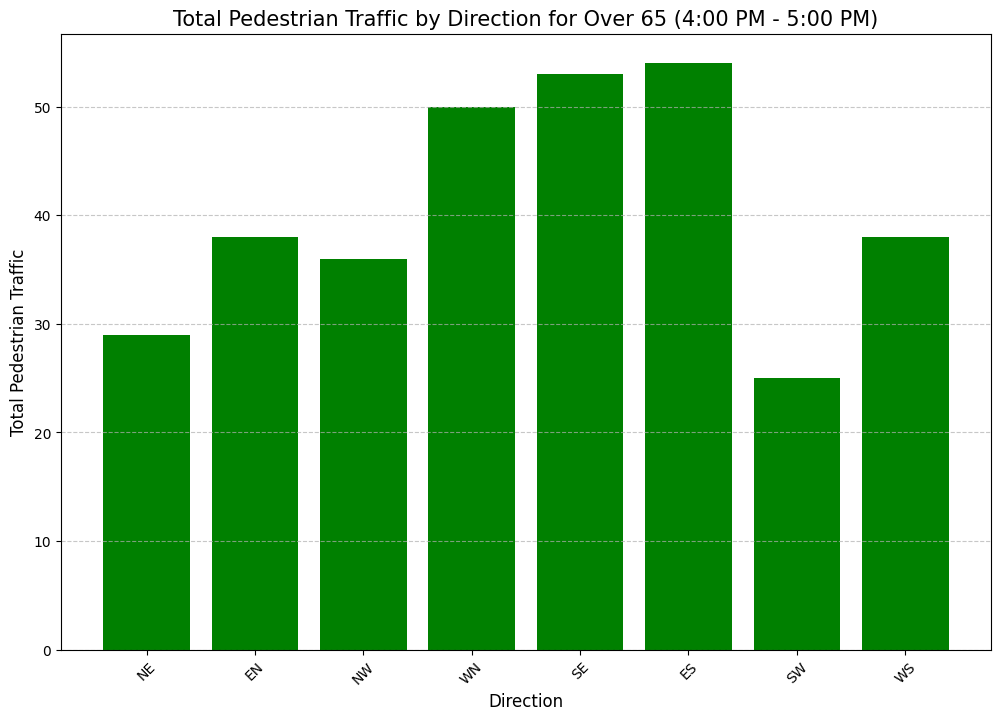

In [19]:
# Calculate the total pedestrian traffic for each direction over the hour for pedestrians aged over 65
older_people_data['Total Pedestrian Traffic'] = older_people_data.iloc[:, 1:].sum(axis=1)

# Setting up the bar chart for total pedestrian traffic
plt.figure(figsize=(12, 8))
plt.bar(older_people_data['Unnamed: 0'], older_people_data['Total Pedestrian Traffic'], color='green')
plt.title('Total Pedestrian Traffic by Direction for Over 65 (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Total Pedestrian Traffic', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


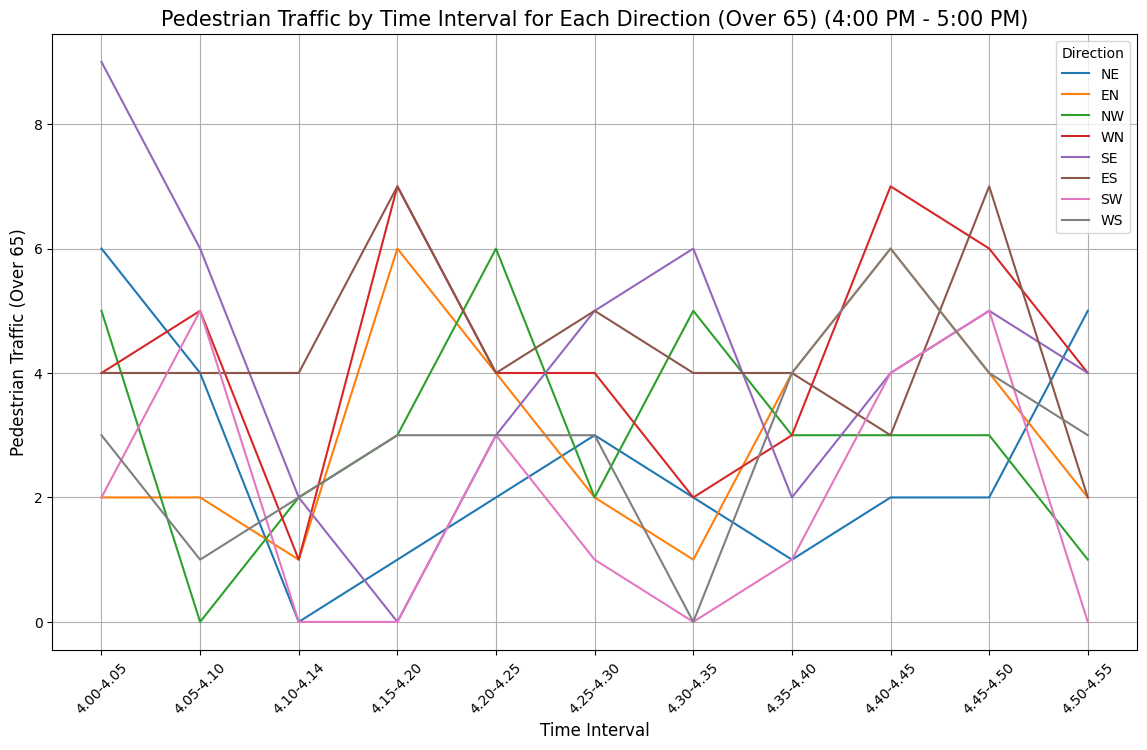

In [20]:
# Adjusting the time series plot to exclude the total traffic column and end at 5:00 PM
time_intervals_older_people_adjusted = older_people_data.columns[1:-2]  # Excluding 'Total Pedestrian Traffic' and '4.55-5.00'

plt.figure(figsize=(14, 8))
for index, row in older_people_data.iterrows():
    plt.plot(time_intervals_older_people_adjusted, row[1:-2], label=row['Unnamed: 0'])  # Adjusting to exclude total traffic

plt.title('Pedestrian Traffic by Time Interval for Each Direction (Over 65) (4:00 PM - 5:00 PM)', fontsize=15)
plt.xlabel('Time Interval', fontsize=12)
plt.ylabel('Pedestrian Traffic (Over 65)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.grid(True)

# Show the adjusted plot
plt.show()
